<a href="https://colab.research.google.com/github/ShravyaMalogi/Data-Analytics/blob/main/02_Data_Preprocessing_in_Noise_detection_removal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Original DataFrame with Noisy Data:
   age   salary  experience
0   25    50000           2
1   27    60000           3
2   28    55000           2
3   30    70000           4
4   22    48000           1
5  100   300000          20
6   29    60000           2
7   30    65000           3
8   32    70000           4
9  500  1000000          25

DataFrame after Removing Noisy Data (Outliers):
   age  salary  experience
0   25   50000           2
1   27   60000           3
2   28   55000           2
3   30   70000           4
4   22   48000           1
6   29   60000           2
7   30   65000           3
8   32   70000           4


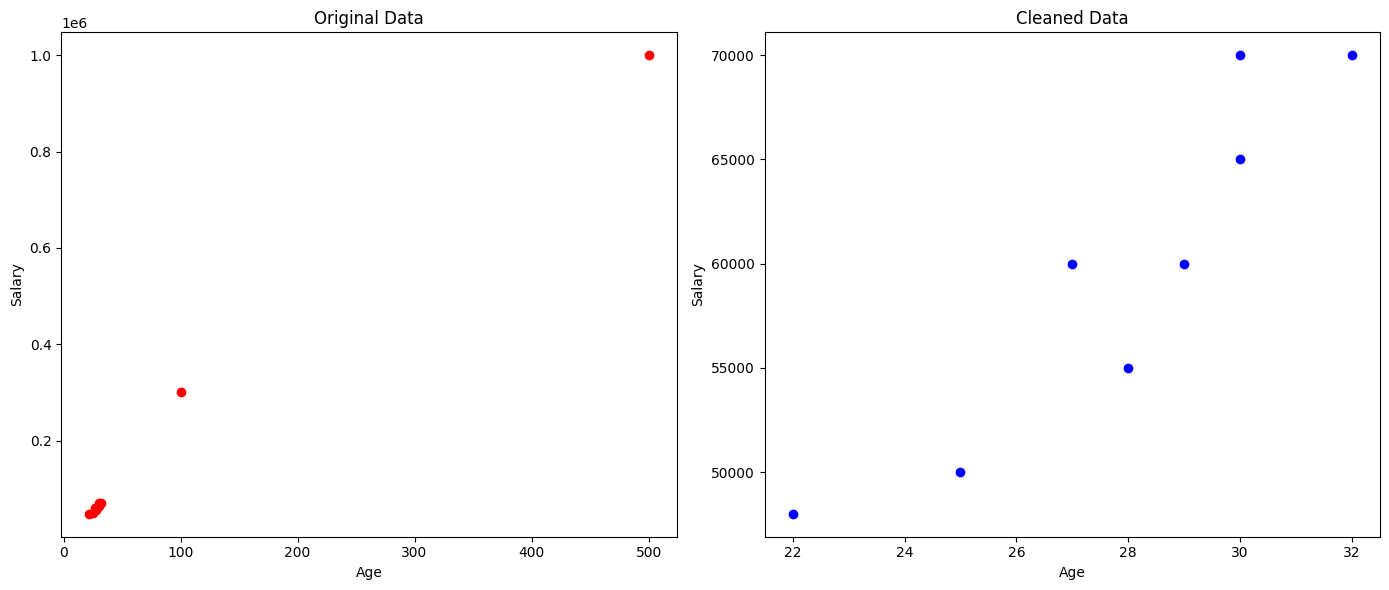

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Create a sample dataframe with noisy data (outliers)
data = {
 'age': [25, 27, 28, 30, 22, 100, 29, 30, 32, 500], # 500 is an outlier
 'salary': [50000, 60000, 55000, 70000, 48000, 300000, 60000, 65000, 70000, 1000000], # 1000000 is an outlier
 'experience': [2, 3, 2, 4, 1, 20, 2, 3, 4, 25], # 25 is an outlier
}

df = pd.DataFrame(data)

# Display the original dataframe
print("Original DataFrame with Noisy Data:")
print(df)

# Step 2: Detecting Outliers using IQR
Q1 = df.quantile(0.25)  # First quartile (25th percentile)
Q3 = df.quantile(0.75)  # Third quartile (75th percentile)
IQR = Q3 - Q1           # Interquartile range

# Define outlier bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Boolean mask for filtering (keep only values within bounds)
outlier_mask = ~((df < lower_bound) | (df > upper_bound)).any(axis=1)
df_cleaned = df[outlier_mask]

# Display the cleaned dataframe
print("\nDataFrame after Removing Noisy Data (Outliers):")
print(df_cleaned)

# Step 3: Visualize the data before and after cleaning
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Original data visualization
axs[0].scatter(df['age'], df['salary'], color='red')
axs[0].set_title('Original Data')
axs[0].set_xlabel('Age')
axs[0].set_ylabel('Salary')

# Cleaned data visualization
axs[1].scatter(df_cleaned['age'], df_cleaned['salary'], color='blue')
axs[1].set_title('Cleaned Data')
axs[1].set_xlabel('Age')
axs[1].set_ylabel('Salary')

plt.tight_layout()
plt.show()